In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import LeaveOneOut, KFold, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# CMSE 381, Fundamental Data Science Methods
## Homework 4, Fall 2025

**Name:** Monis, Lowell

---

### Question 1: ISLP $\S$ 5.4.3

We now review $k$-fold cross-validation.

#### (a) Explain how k-fold cross-validation is implemented.

The $k$-fold cross-validation method is a more generalized form of the leave-one-out cross-validation method. This approach involves randomly dividing the set of observations, after shuffling, into $k$ groups, which we will call folds, of ideally equal size, or approximately equal size in non-ideal scenarios. The first fold is treated as a validation set, and the method is fit to the remaining ($k-1$) folds. Them, the MSE for the first fold, say $\text{MSE}_1$, is computed on the observations in the validation fold. This procedure is then repeated $k$ times, until each fold is treated as the validation set once. This process will result in $k$ estimates of the test error, $\text{MSE}_k$. the $k$-fold CV estimate is computed by averaging all $\text{MSE}_k$:

$$\text{CV}_{(k)}=\frac{1}{k}\sum_{i=1}^{k}\text{MSE}_i$$

LOOCV is basically $n$-fold CV, where $n$ is the number of data points.

*Reference:* ISLP $\S$ 5.1.3

#### (b) What are the advantages and disadvantages of $k$-fold cross-validation relative to:

##### i. the validation set approach

Compared to the validation set approach, $k$-fold CV is generally preferred because it produces a less biased and less variable estimate of the test error rate. It is less biased because a larger fraction of the available observations are used to fit the model. This extensive use of the data also dramatically reduces the variance of the error estimate, as the result is not dependent on a single, arbitrary split of the observations. The main disadvantage of $k$-fold CV relative to the validation set approach is that it requires fitting the model $k$ times, making it more computationally expensive.

##### ii. LOOCV

Relative to LOOCV (which is $k$-fold CV with $k=n$), $k$-fold CV offers two primary advantages: computational speed and lower variance. It is much faster because the model is fit only $k$ times (e.g., $k=10$) instead of $n$ times. Critically, $k$-fold CV tends to have lower variance in the estimated test error than LOOCV, because the $k$ training sets used are less correlated with each other than the $n$ nearly identical training sets used in LOOCV. The slight drawback is that $k$-fold CV introduces a bit more bias since the training set used is smaller ($\frac{n(k-1)}{k}$ observations compared to $n-1$) and thus the model is trained on less data. For these reasons, choosing a $k$ of 5 or 10 is often considered a good trade-off between bias and variance.

### Question 2: ISLP $\S$ 5.4.5

In Chapter 4, we used logistic regression to predict the probability of default using `income` and `balance` on the `Default` data set. We will now estimate the test error of this logistic regression model using the validation set approach. Do not forget to set a random seed before beginning your analysis.

#### (a) Fit a logistic regression model that uses `income` and `balance` to predict `default`.

First, we load the `Default` data set from the repository.

In [3]:
data=pd.read_csv('../data/Default.csv')
data['default']=(data['default'] == 'Yes').astype(int)
data.head()

,default,student,balance,income
0,0,No,729.526495,44361.62507
1,0,Yes,817.180407,12106.13470
2,0,No,1073.549164,31767.13895
3,0,No,529.250605,35704.49394
4,0,No,785.655883,38463.49588


We then train a model on the data. We will not be doing a validation split on this data yet. We build the model by first setting the seed and one-hot encoding the response variable, since its current type is string. We then use the `logit()` method of `statsmodels.formula.api` to train the model on the whole data set.

In [4]:
np.random.seed(381)
model = smf.logit('default~income+balance', data).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.078948
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Fri, 03 Oct 2025   Pseudo R-squ.:                  0.4594
Time:                        12:25:51   Log-Likelihood:                -789.48
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                4.541e-292
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.5405      0.435    -26.544      0.000     -12.393     -10.688
income      2.081e-05   4.99e-06      4.174      0.000     1.1e-05    3.06e-05
balance        0.0056      0.000     24.835      0.000       0.005       0.006
==============================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

#### (b) Using the validation set approach, estimate the test error of this model.

i. We first split the sample set into a training set and a validation set. The split is equal.

In [5]:
data_train, data_validation = train_test_split(data, test_size=0.5, random_state=381)

ii. We then fit a multiple logistic regression model using only the training observations.

In [6]:
model1 = smf.logit('default~income+balance', data_train).fit()
model1.summary()

Optimization terminated successfully.
         Current function value: 0.081512
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4997
Method:                           MLE   Df Model:                            2
Date:                Fri, 03 Oct 2025   Pseudo R-squ.:                  0.4507
Time:                        12:25:55   Log-Likelihood:                -407.56
converged:                       True   LL-Null:                       -741.91
Covariance Type:            nonrobust   LLR p-value:                6.182e-146
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.5318      0.603    -19.132      0.000     -12.713     -10.350
income      2.373e-05   6.87e-06      3.453      0.001    1.03e-05    3.72e-05
balance        0.0056      0.000     17.641      0.000       0.005       0.006
==============================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

iii. We now obtain a prediction of `default` status for each individual in the validation set by computing the posterior probability of `default` for that individual, and classifying the individual to the `default` category if the posterior probability is greater than $0.5$.

In [7]:
predictions1 = np.where(model1.predict(data_validation) > 0.5, 1, 0)

iv. We then compute the validation set error, which is the fraction of the observations in the validation set that are misclassified.

In [8]:
np.mean(predictions1 != data_validation['default'])

np.float64(0.0248)

The validation set error for this model, split, and seed, is about $2.48\%$.

#### (c) Repeat the process in (b) three times, using three different splits of the observations into a training set and a validation set. Comment on the results obtained.

To conduct this process, we will be repeating each model fit with a different seed. The first repetition will be done with seed `465`.

In [9]:
data_train, data_validation = train_test_split(data, test_size=0.5, random_state=465)
model2 = smf.logit('default~income+balance', data_train).fit()
predictions2 = np.where(model2.predict(data_validation) > 0.5, 1, 0)
model2.summary()

Optimization terminated successfully.
         Current function value: 0.077249
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4997
Method:                           MLE   Df Model:                            2
Date:                Fri, 03 Oct 2025   Pseudo R-squ.:                  0.4863
Time:                        12:25:59   Log-Likelihood:                -386.24
converged:                       True   LL-Null:                       -751.93
Covariance Type:            nonrobust   LLR p-value:                1.534e-159
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -12.2894      0.661    -18.591      0.000     -13.585     -10.994
income      2.933e-05   7.21e-06      4.066      0.000    1.52e-05    4.35e-05
balance        0.0060      0.000     17.583      0.000       0.005       0.007
==============================================================================

Possibly complete quasi-separation: A fraction 0.17 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [10]:
np.mean(predictions2 != data_validation['default'])

np.float64(0.0274)

The validation set error for the validation split determined by the seed `465` is $2.74\%$.

The second repetition will use the seed `402`.

In [11]:
data_train, data_validation = train_test_split(data, test_size=0.5, random_state=402)
model3 = smf.logit('default~income+balance', data_train).fit()
predictions3 = np.where(model3.predict(data_validation) > 0.5, 1, 0)
model3.summary()

Optimization terminated successfully.
         Current function value: 0.069673
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4997
Method:                           MLE   Df Model:                            2
Date:                Fri, 03 Oct 2025   Pseudo R-squ.:                  0.4856
Time:                        12:26:02   Log-Likelihood:                -348.36
converged:                       True   LL-Null:                       -677.18
Covariance Type:            nonrobust   LLR p-value:                1.570e-143
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -12.4179      0.701    -17.711      0.000     -13.792     -11.044
income      2.192e-05   7.63e-06      2.872      0.004    6.96e-06    3.69e-05
balance        0.0061      0.000     16.631      0.000       0.005       0.007
==============================================================================

Possibly complete quasi-separation: A fraction 0.21 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [12]:
np.mean(predictions3 != data_validation['default'])

np.float64(0.0292)

The validation set error for the validation split determined by the seed `402` is $2.92\%$.

The third repetition will use the seed `415`.

In [13]:
data_train, data_validation = train_test_split(data, test_size=0.5, random_state=415)
model4 = smf.logit('default~income+balance', data_train).fit()
predictions4 = np.where(model4.predict(data_validation) > 0.5, 1, 0)
model4.summary()

Optimization terminated successfully.
         Current function value: 0.082030
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4997
Method:                           MLE   Df Model:                            2
Date:                Fri, 03 Oct 2025   Pseudo R-squ.:                  0.4640
Time:                        12:26:05   Log-Likelihood:                -410.15
converged:                       True   LL-Null:                       -765.19
Covariance Type:            nonrobust   LLR p-value:                6.417e-155
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.5815      0.605    -19.148      0.000     -12.767     -10.396
income       2.34e-05   6.86e-06      3.414      0.001    9.97e-06    3.68e-05
balance        0.0057      0.000     18.001      0.000       0.005       0.006
==============================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [14]:
np.mean(predictions4 != data_validation['default'])

np.float64(0.0246)

The validation set error for the validation split determined by the seed `382` is $2.46\%$.

The following table compares the error between each model trained.

| Model | Seed | Validation Set Error |
|-------|------|----------------------|
| 0     | 381  | 2.48%                |
| 1     | 465  | 2.74%                |
| 2     | 402  | 2.92%                |
| 3     | 415  | 2.46%                |

#### (d) Now consider a logistic regression model that predicts the probability of `default` using `income`, `balance`, and a dummy variable for `student`. Estimate the test error for this model using the validation set approach. Comment on whether or not including a dummy variable for `student` leads to a reduction in the test error rate.

We will reload the data set before cleaning it up to prevent overwriting in case the code is run again accidentally.

In [15]:
data=pd.read_csv('../data/Default.csv')
data['default']=(data['default'] == 'Yes').astype(int)
data['student']=(data['student'] == 'Yes').astype(int)
data.head()

,default,student,balance,income
0,0,0,729.526495,44361.62507
1,0,1,817.180407,12106.13470
2,0,0,1073.549164,31767.13895
3,0,0,529.250605,35704.49394
4,0,0,785.655883,38463.49588


We can now train a new model. We will set the seed at `381` here to ensure the results remain constant and are reproducible. This also helps with an equitable comparison with the original model.

In [16]:
data_train, data_validation = train_test_split(data, test_size=0.5, random_state=381)
model5 = smf.logit('default~income+balance+student', data_train).fit()
predictions5 = np.where(model5.predict(data_validation) > 0.5, 1, 0)
model5.summary()

Optimization terminated successfully.
         Current function value: 0.081253
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4996
Method:                           MLE   Df Model:                            3
Date:                Fri, 03 Oct 2025   Pseudo R-squ.:                  0.4524
Time:                        12:26:11   Log-Likelihood:                -406.27
converged:                       True   LL-Null:                       -741.91
Covariance Type:            nonrobust   LLR p-value:                3.518e-145
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.9724      0.687    -15.968      0.000     -12.319      -9.626
income      9.104e-06   1.14e-05      0.799      0.424   -1.32e-05    3.14e-05
balance        0.0057      0.000     17.561      0.000       0.005       0.006
student       -0.5397      0.334     -1.615      0.106      -1.195       0.115
==============================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [17]:
np.mean(predictions5 != data_validation['default'])

np.float64(0.0256)

The validation set error when we include `student` as a dummy variable is $2.56\%$. This is an increase from when `student` is not included. So including the fact whether the record belongs to a student or not does not lead to a reduction in the validation set error.

### Question 3: ISLP $\S$ 5.4.8

We will now perform cross-validation on a simulated data set.

#### (a) Generate a simulated data set as given in the text. In this data set, what is $n$ and what is $p$? Write out the model used to generate the data in equation form.

From the code used to simulate the data set, we can determine that $n=100$, since 100 data points are being generated, and $p=1$, since there is only one predictor variable, despite there being two terms in the model. At the end, the second term, $x^2$, is still using the same predictor, $x$ to create a polynomial model.

The model used to generate the data is:

$$y=x-2x^2+\epsilon$$

where $\epsilon$ is the random noise generated.

In [18]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = x - 2 * x**2 + rng.normal(size=100)

#### (b) Create a scatterplot of $X$ against $Y$. Comment on what you find.

Text(0, 0.5, 'Y')

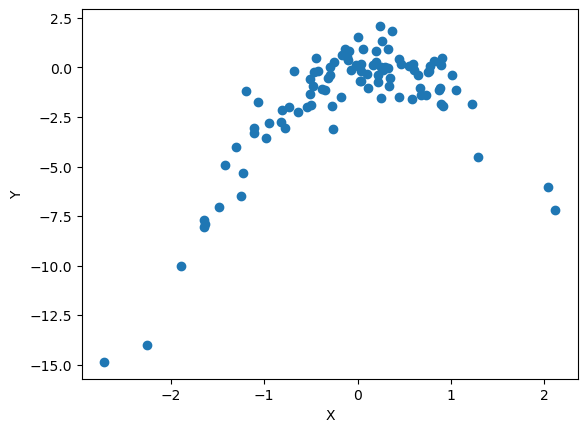

In [20]:
plt.scatter(x,y); plt.xlabel('X'); plt.ylabel('Y')

The plot demonstrates what looks like a polynomial-based model of the second degree (quadratic). The general trend is a parabola with its mouth facing towards negative infinity on the y-axis (negative concavity). There is minimal noise, and the parabola, if ideal, would likely rest on the origin.

#### (c) Set a random seed, and then compute the LOOCV errors that result from fitting the following four models using least squares.

The models being trained are:

1. $Y=\beta_0+\beta_1X+\epsilon$
2. $Y=\beta_0+\beta_1X+\beta_2X^2+\epsilon$
3. $Y=\beta_0+\beta_1X+\beta_2X^2+\beta_3X^3+\epsilon$
4. $Y=\beta_0+\beta_1X+\beta_2X^2+\beta_3X^3+\beta_4X^4+\epsilon$

We first create the data frame `sim` to host the above data.

In [23]:
sim=pd.DataFrame({'x':x,'y':y})

We can now initiate the LOOCV object and train the models. We set the seed at `1` and proceed with calculating the LOOCV errors. We will use `sklearn` over `statsmodels` here for ease of use with the new methods being implemented.

In [53]:
np.random.seed(1)
loocv_results = {}
for deg in range(1,5):
    sim_poly=np.column_stack([sim.x**p for p in range(1,deg+1)])
    mse_list = []
    model = LinearRegression()
    for train_index, test_index in loo.split(sim_poly):
        X_train, X_test = sim_poly[train_index], sim_poly[test_index]
        y_train, y_test = sim.y[train_index], sim.y[test_index]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse_list.append(mean_squared_error(y_test, y_pred))
    loocv_mse=np.mean(mse_list)
    loocv_results[f'Model (d={deg})'] = loocv_mse
for model_name, mse in loocv_results.items():
    print(f"  {model_name}: {mse:.4f}")

  Model (d=1): 6.6330
  Model (d=2): 1.1229
  Model (d=3): 1.3018
  Model (d=4): 1.3324


#### (d) Repeat (c) using another random seed, and report your results. Are your results the same as what you got in (c)? Why?

Upon repeating the modeling using seed `381`, we get the same results. This is because we are only remove one data point for testing in each train-test split. This eliminates any randomness that exists within the model. In other words, the training is done in exactly the same order no matter the seed, unlike the case where we use a method like $k$-fold, where the different folds will vary, introducing randomness in the process.

In [54]:
np.random.seed(381)
loocv_results = {}
for deg in range(1,5):
    sim_poly=np.column_stack([sim.x**p for p in range(1,deg+1)])
    mse_list = []
    model = LinearRegression()
    for train_index, test_index in loo.split(sim_poly):
        X_train, X_test = sim_poly[train_index], sim_poly[test_index]
        y_train, y_test = sim.y[train_index], sim.y[test_index]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse_list.append(mean_squared_error(y_test, y_pred))
    loocv_mse=np.mean(mse_list)
    loocv_results[f'Model (d={deg})'] = loocv_mse
for model_name, mse in loocv_results.items():
    print(f"  {model_name}: {mse:.4f}")

  Model (d=1): 6.6330
  Model (d=2): 1.1229
  Model (d=3): 1.3018
  Model (d=4): 1.3324


#### (e) Which of the models in (c) had the smallest LOOCV error? Is this what you expected? Explain your answer.

It looks like model 2, or the quadratic model $Y=\beta_0+\beta_1X+\beta_2X^2+\epsilon$, has the smallest LOOCV error. This was expected, considering the true data generating process was based on a quadratic model $y=X-2x^2+\epsilon$. This way, the quadratic term provides the best fit among the four models, with the linear model generating the most error since it is the least flexible (due to the missing quadratic term), and the cubic and fourth-degree model producing more error as compared to the quadratic model due to overfitting caused by its high flexibility.

#### (f) (Modified) Repeat part (c) using $k$-fold CV for $k=5,10,15,20$. Plot your results for error vs. degree for all these plus the LOOCV version. What do you notice?

First, let's set up a data frame to store the errors for each value of $k$. LOOCV is the special case of $k$-fold CV, where $k=n$.

In [63]:
errors = pd.DataFrame({'model':loocv_results.keys(),'kn':loocv_results.values()})
errors['degree'] = errors.index+1
errors = errors[['model','degree','kn']]

We can now create the models for each value of $k$. I like automating this process as much as possible with the help of loops. I am also setting the seed at `1`.

In [64]:
k_values = [5, 10, 15, 20]
for k in k_values:
    np.random.seed(1)
    kf = KFold(n_splits=k, shuffle=True, random_state=1)
    kfold_results = {}
    for deg in range(1, 5):
        sim_poly = np.column_stack([sim.x**p for p in range(1,deg+1)])
        mse_list = []
        model = LinearRegression()
        for train_index, test_index in kf.split(sim_poly):
            X_train, X_test = sim_poly[train_index], sim_poly[test_index]
            y_train, y_test = sim.y[train_index], sim.y[test_index]
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            mse_list.append(mean_squared_error(y_test, y_pred))
        kfold_mse = np.mean(mse_list)
        kfold_results[f'Model (d={deg})'] = kfold_mse
    errors[f'k{k}'] = kfold_results.values()

We can now proceed with plotting the results.

In [65]:
errors

,model,degree,kn,k5,k10,k15,k20
0,Model (d=1),1,6.633030,6.811787,6.601821,6.593518,6.673826
1,Model (d=2),2,1.122937,1.225392,1.148015,1.114624,1.112671
2,Model (d=3),3,1.301797,1.343901,1.318824,1.285709,1.304488
3,Model (d=4),4,1.332394,1.167000,1.283247,1.281072,1.311173


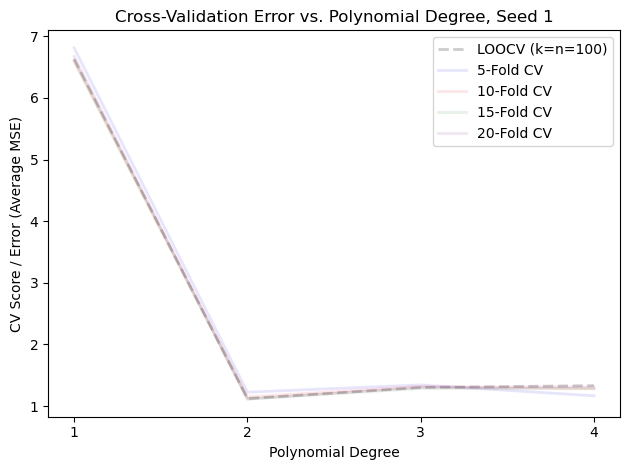

In [78]:
plt.plot(errors['degree'], errors['kn'], linestyle='dashed', linewidth=2, label='LOOCV (k=n=100)', color='black', alpha=0.2)
colors = ['blue', 'red', 'green', 'purple']
for i, k in enumerate(k_values):
    plt.plot(errors['degree'], errors[f'k{k}'], linewidth=2, label=f'{k}-Fold CV', color=colors[i], alpha=0.1)
plt.xlabel('Polynomial Degree')
plt.ylabel('CV Score / Error (Average MSE)')
plt.title('Cross-Validation Error vs. Polynomial Degree, Seed 1')
plt.legend()
plt.xticks(errors['degree'])
plt.tight_layout()
plt.show()

If one looks at the plot at a slight glance, it looks like there is hardly any difference, which is true. But it is important we take a closer look at a micro level:

1. All methods agree that the quadratic model is the best model in terms of error.
2. As $k$ increases, $k$-fold CV errors approach LOOCV errors, which makes sense, since LOOCV provides the largest possible value of $k=n$.
4. All CV methods show the same overall pattern, and nearly identical curves: degree 1 has the highest error rate, degree 2 has the lowest, and degree 3 and 4 face slight increases in error rate due to overfitting. Model 2 is not sensitive to the CV method used, essentially.
5. Practically, 10-fold or 15-fold is sufficient for model selection, since they nearly replicate the results provided by LOOCV, without the computational expenses that LOOCV brings about. LOOCV requires 100 model fits, compared to 10 or 15 in 10-fold or 15-fold.
6. I would avoid 5-fold, since it has slightly higher error rates for what should be the optimal model, and offers lesser penalties for model 4, which has the unnecessary third and fourth degree terms, by its smaller error.
7. All methods successfully avoid overfitting by correctly penalizing the unnecessary higher-degree terms in the third and fourth degree terms, providing us with a slightly higher error.